In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'


parameters = {
    'start':'1',
    'limit':'10',
    'convert':'USD'
}

headers = {
    'Accepts' : 'application/json',
    'X-CMC_PRO_API_KEY' : 'e4f8270d-422c-48cc-8fac-579e7fb8f852',
}

session = Session()
session.headers.update(headers)

try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
    #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)


In [2]:
type(data)

dict

In [3]:
import pandas as pd

#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [4]:
#This normalizes the data and makes it all pretty in a df
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.981631e+07,1.981631e+07,False,NaN,1,None,None,None,2025-01-28T17:53:00.000Z,102491.578864,5.183718e+10,-35.9461,0.482067,3.244625,-3.340153,9.297894,5.274028,42.748960,2.031005e+12,58.1449,2.152323e+12,None,2025-01-28T17:53:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 20:55:04.147996
1,1027,Ethereum,ETH,ethereum,9901,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.205120e+08,1.205120e+08,True,NaN,2,None,None,None,2025-01-28T17:54:00.000Z,3158.248509,2.121248e+10,-42.7174,0.525203,2.717728,-5.534703,-5.849933,-12.050151,18.133069,3.806070e+11,10.8978,3.806070e+11,None,2025-01-28T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 20:55:04.147996
2,52,XRP,XRP,xrp,1518,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",1.000000e+11,5.764121e+10,9.998659e+10,False,NaN,3,None,None,None,2025-01-28T17:54:00.000Z,3.153894,9.725351e+09,-34.5558,-0.631861,7.778992,-1.774791,47.144009,84.617074,503.181712,1.817943e+11,5.2045,3.153894e+11,None,2025-01-28T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 20:55:04.147996
3,825,Tether USDt,USDT,tether,114983,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,1.394574e+11,1.415730e+11,True,NaN,4,None,None,None,2025-01-28T17:54:00.000Z,0.999905,9.604703e+10,-37.8207,-0.011776,0.032856,-0.009178,0.167601,-0.105323,0.025638,1.394442e+11,3.9921,1.415596e+11,None,2025-01-28T17:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-28 20:55:04.147996
4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.866685e+08,5.928802e+08,True,NaN,5,None,None,None,2025-01-28T17:54:00.000Z,234.143612,5.584937e+09,-46.2310,-0.109387,2.956713,-5.860693,21.427837,-2.839281,33.764602,1.139503e+11,3.2627,1.388191e+11,None,2025-01-28T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 20:55:04.147996
5,1839,BNB,BNB,bnb,2344,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.424808e+08,1.424808e+08,False,NaN,6,None,None,None,2025-01-28T17:54:00.000Z,672.845548,1.722456e+09,-23.5514,0.277863,1.839142,-3.157175,-3.915034,2.592905,12.554663,9.586759e+10,2.7446,9.586759e+10,None,2025-01-28T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 20:55:04.147996
6,3408,USDC,USDC,usd-coin,25255,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.244146e+10,5.244146e+10,False,NaN,7,None,None,None,2025-01-28T17:54:00.000Z,0.999967,8.723509e+09,-35.9088,-0.011618,-0.002591,-0.023677,-0.007740,-0.010068,0.006770,5.243972e+10,1.5015,5.243972e+10,None,2025-01-28T17:54:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-28 20:55:04.147996
7,74,Dogecoin,DOGE,dogecoin,1158,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.478132e+11,1.478132e+11,True,NaN,8,None,None,None,2025-01-28T17:54:00.000Z,0.327857,2.029280e+09,-53.6978,-0.288691,1.888363,-14.250499,3.889089,-22.276390,96.550373,4.846158e+10,1.3874,4.846158e+10,None,2025-01-28T17:54:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 20:55:04.147996
8,2010,Cardano,ADA,cardano,1452,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-co

In [5]:
def api_runner():
    global df
    
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    
    parameters = {
        'start':'1',
        'limit':'15',
        'convert':'USD'
    }
    
    headers = {
    'Accepts' : 'application/json',
    'X-CMC_PRO_API_KEY' : 'e4f8270d-422c-48cc-8fac-579e7fb8f852',
    }
    
    session = Session()
    session.headers.update(headers)
    
    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    #print(data)
    
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df2
    
    if not os.path.isfile(r'C:\Users\ryanm\Documents\Python scripts\API.csv'):
        df.to_csv(r'C:\users\ryanm\Documents\Python scripts\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\users\ryanm\Documents\Python scripts\API.csv',mode ='a', header=False)    


In [6]:
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner Completed well')
    sleep(60) #sleep for 1 minute
exit()

API Runner Completed well
API Runner Completed well
API Runner Completed well
API Runner Completed well
API Runner Completed well
API Runner Completed well


KeyboardInterrupt: 

In [7]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11884,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19816309.00000,19816309.00000,False,NaN,1,None,None,None,2025-01-28T17:58:00.000Z,102617.49639,51765335627.39132,-36.15080,0.44148,3.44974,-3.28796,9.40837,5.61873,42.77082,2033500017213.43042,58.19010,2154967424129.38989,None,2025-01-28T17:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 21:00:19.343919
1,1027,Ethereum,ETH,ethereum,9901,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120512039.58993,120512039.58993,True,NaN,2,None,None,None,2025-01-28T17:59:00.000Z,3169.52022,21488420022.79684,-41.38200,0.71672,3.14798,-5.40360,-5.52928,-11.61462,18.56630,381965346342.57672,10.93760,381965346342.58002,None,2025-01-28T17:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 21:00:19.343919
2,52,XRP,XRP,xrp,1518,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, xrp...",100000000000.00000,57641211234.00000,99986586496.00000,False,NaN,3,None,None,None,2025-01-28T17:59:00.000Z,3.14918,9699574725.29745,-34.84560,-0.82009,7.90004,-2.09221,46.93550,84.31363,502.09265,181522633369.36807,5.19440,314918145339.56000,None,2025-01-28T17:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 21:00:19.343919
3,825,Tether USDt,USDT,tether,114983,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, ethereum...",NaN,139457358263.17755,141572991334.01886,True,NaN,4,None,None,None,2025-01-28T17:59:00.000Z,0.99990,95824316021.01036,-38.06920,-0.00892,0.03154,0.00786,0.16472,-0.09528,0.02630,139443010872.24982,3.99030,141558426286.48999,None,2025-01-28T17:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2025-01-28 21:00:19.343919
4,5426,Solana,SOL,solana,834,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,486668534.52467,592880208.43216,True,NaN,5,None,None,None,2025-01-28T17:59:00.000Z,234.34495,5550853387.92342,-46.77990,0.09249,3.28768,-5.89994,21.52318,-2.61233,33.74121,114048314526.94856,3.26580,138938484186.39999,None,2025-01-28T17:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 21:00:19.343919
5,1839,BNB,BNB,bnb,2344,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,142480832.79000,142480832.79000,False,NaN,6,None,None,None,2025-01-28T17:59:00.000Z,672.84401,1726162148.26718,-23.17690,0.48251,1.96351,-3.16249,-3.85884,2.69040,12.52365,95867374569.59840,2.74330,95867374569.60001,None,2025-01-28T17:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2025-01-28 21:00:19.343919
6,3408,USDC,USDC,usd-coin,25255,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,52441456288.43067,52441456288.43067,False,NaN,7,None,None,None,2025-01-28T17:59:00.000Z,1.00002,8975019325.17114,-32.33080,-0.00270,0.01414,-0.00000,0.00553,0.00484,0.01573,52442252771.80150,1.50170,52442252771.80000,None,2025-01-28T17:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2025-01-28 21:00:19.343919
7,74,Dogecoin,DOGE,dogecoin,1158,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,147813166383.70523,147813166383.70523,True,NaN,8,None,None,None,2025-01-28T17:59:00.000Z,0.32805,2022814818.36598,-53.92640,0.10166,2.23303,-14.23267,3.93733,-22.13207,96.63446,48489425963.55550,1.38760,48489425963.56000,None,2025-01

In [69]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',
                               'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d',
                               'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'
                               ]].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.06485,3.59844,-1.73033,8.23562,5.47544,42.69556
Ethereum,-0.28163,4.01079,-3.78351,-6.20700,-11.52592,19.28892
XRP,1.10460,13.90287,0.87381,45.69639,91.50779,506.84909
Tether USDt,-0.00541,0.03329,0.07510,0.15991,-0.05876,0.04193
Solana,-0.28988,5.95051,-1.50727,21.14513,-3.06617,35.38961
BNB,-0.00048,3.47404,-2.33090,-4.85266,2.86488,13.10009
USDC,-0.00050,-0.00727,-0.01338,-0.00629,-0.01522,0.02059
Dogecoin,-0.42723,6.89466,-13.00322,2.36178,-19.44728,95.67339
Cardano,-0.16364,8.59765,-4.77455,7.29159,-9.84687,171.91211


In [70]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.06485
             quote.USD.percent_change_24h     3.59844
             quote.USD.percent_change_7d     -1.73033
             quote.USD.percent_change_30d     8.23562
             quote.USD.percent_change_60d     5.47544
             quote.USD.percent_change_90d    42.69556
Ethereum     quote.USD.percent_change_1h     -0.28163
             quote.USD.percent_change_24h     4.01079
             quote.USD.percent_change_7d     -3.78351
             quote.USD.percent_change_30d    -6.20700
             quote.USD.percent_change_60d   -11.52592
             quote.USD.percent_change_90d    19.28892
XRP          quote.USD.percent_change_1h      1.10460
             quote.USD.percent_change_24h    13.90287
             quote.USD.percent_change_7d      0.87381
             quote.USD.percent_change_30d    45.69639
             quote.USD.percent_change_60d    91.50779
             quote.USD.percent_change_90

In [71]:
type(df4)

pandas.core.series.Series

In [72]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.06485
            quote.USD.percent_change_24h   3.59844
            quote.USD.percent_change_7d   -1.73033
            quote.USD.percent_change_30d   8.23562
            quote.USD.percent_change_60d   5.47544
            quote.USD.percent_change_90d  42.69556
Ethereum    quote.USD.percent_change_1h   -0.28163
            quote.USD.percent_change_24h   4.01079
            quote.USD.percent_change_7d   -3.78351
            quote.USD.percent_change_30d  -6.20700
            quote.USD.percent_change_60d -11.52592
            quote.USD.percent_change_90d  19.28892
XRP         quote.USD.percent_change_1h    1.10460
            quote.USD.percent_change_24h  13.90287
            quote.USD.percent_change_7d    0.87381
            quote.USD.percent_change_30d  45.69639
            quote.USD.percent_change_60d  91.50779
            quote.USD.percent_change_90d 506.84909
Tether USDt quote.USD.percent_change_1h   -0.00541
            quote.USD.percent_change_24h   0.03329
            quote.USD.percent_change_7d    0.07510
            quote.USD.percent_change_30d   0.15991
            quote.USD.percent_change_60d  -0.05876
            quote.USD.percent_change_90d   0.04193
Solana      quote.USD.percent_change_1h   -0.28988
            quote.USD.percent_change_24h   5.95051
            quote.USD.percent_change_7d   -1.50727
            quote.USD.percent_change_30d  21.14513
            quote.USD.percent_change_60d  -3.06617
            quote.USD.percent_change_90d  35.38961
BNB         quote.USD.percent_change_1h   -0.00048
            quote.USD.percent_change_24h   3.47404
            quote.USD.percent_change_7d   -2.33090
            quote.USD.percent_change_30d  -4.85266
            quote.USD.percent_change_60d   2.86488
            quote.USD.percent_change_90d  13.10009
USDC        quote.USD.percent_change_1h   -0.00050
            quote.USD.percent_change_24h  -0.00727
            quote.USD.percent_change_7d   -0.01338
            quote.USD.percent_change_30d  -0.00629
            quote.USD.percent_change_60d  -0.01522
            quote.USD.percent_change_90d   0.02059
Dogecoin    quote.USD.percent_change_1h   -0.42723
            quote.USD.percent_change_24h   6.89466
            quote.USD.percent_change_7d  -13.00322
            quote.USD.percent_change_30d   2.36178
            quote.USD.percent_change_60d -19.44728
            quote.USD.percent_change_90d  95.67339
Cardano     quote.USD.percent_change_1h   -0.16364
            quote.USD.percent_change_24h   8.59765
            quote.USD.percent_change_7d   -4.77455
            quote.USD.percent_change_30d   7.29159
            quote.USD.percent_change_60d  -9.84687
            quote.USD.percent_change_90d 171.91211
TRON        quote.USD.percent_change_1h   -0.32850
            quote.USD.percent_change_24h   3.72501
            quote.USD.percent_change_7d    2.00734
            quote.USD.percent_change_30d  -4.79849
            quote.USD.percent_change_60d  20.94097
            quote.USD.percent_change_90d  47.05549
Chainlink   quote.USD.percent_change_1h   -0.35326
            quote.USD.percent_change_24h   6.75266
            quote.USD.percent_change_7d   -9.00319
            quote.USD.percent_change_30d  11.39437
            quote.USD.percent_change_60d  32.09124
            quote.USD.percent_change_90d  98.87243
Avalanche   quote.USD.percent_change_1h    0.19047
            quote.USD.percent_change_24h   3.23606
            quote.USD.percent_change_7d   -7.55951
            quote.USD.percent_change_30d  -7.78901
            quote.USD.percent_change_60d -22.31225
            quote.USD.percent_change_90d  29.72957
Stellar     quote.USD.percent_change_1h    1.32567
            quote.USD.percent_change_24h  10.73871
            quote.USD.percent_change_7d   -6.27450
            quote.USD.percent_change_30d  19.08940
            quote.USD.percent_change_60d -21.27592
            quo

In [44]:
df5.count()

values    90
dtype: int64

In [73]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06485
1,Bitcoin,quote.USD.percent_change_24h,3.59844
2,Bitcoin,quote.USD.percent_change_7d,-1.73033
3,Bitcoin,quote.USD.percent_change_30d,8.23562
4,Bitcoin,quote.USD.percent_change_60d,5.47544
5,Bitcoin,quote.USD.percent_change_90d,42.69556
6,Ethereum,quote.USD.percent_change_1h,-0.28163
7,Ethereum,quote.USD.percent_change_24h,4.01079
8,Ethereum,quote.USD.percent_change_7d,-3.78351
9,Ethereum,quote.USD.percent_change_30d,-6.20700


In [74]:
df7 = df6.rename(columns={'level_1' : 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.06485
1,Bitcoin,quote.USD.percent_change_24h,3.59844
2,Bitcoin,quote.USD.percent_change_7d,-1.73033
3,Bitcoin,quote.USD.percent_change_30d,8.23562
4,Bitcoin,quote.USD.percent_change_60d,5.47544
5,Bitcoin,quote.USD.percent_change_90d,42.69556
6,Ethereum,quote.USD.percent_change_1h,-0.28163
7,Ethereum,quote.USD.percent_change_24h,4.01079
8,Ethereum,quote.USD.percent_change_7d,-3.78351
9,Ethereum,quote.USD.percent_change_30d,-6.20700


In [75]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d',
                                                       'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'
                                                      ],['1h','24h','7d','30d','60d','90d'] )
df7

,name,percent_change,values
0,Bitcoin,1h,-0.06485
1,Bitcoin,24h,3.59844
2,Bitcoin,7d,-1.73033
3,Bitcoin,30d,8.23562
4,Bitcoin,60d,5.47544
5,Bitcoin,90d,42.69556
6,Ethereum,1h,-0.28163
7,Ethereum,24h,4.01079
8,Ethereum,7d,-3.78351
9,Ethereum,30d,-6.20700


In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

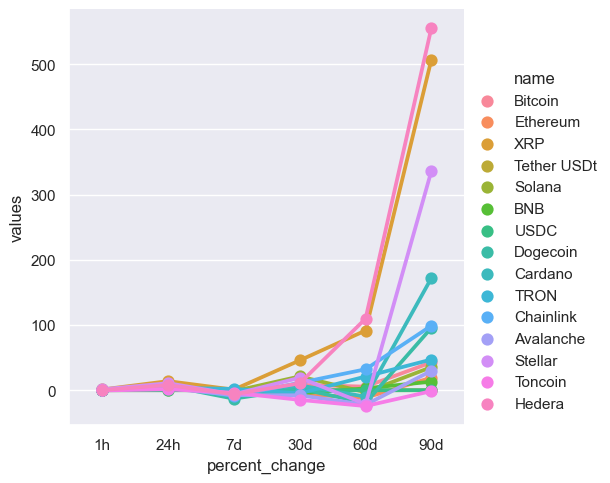

In [77]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [57]:
df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,102605.73077,2025-01-28 15:33:22.640886


C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ryanm\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

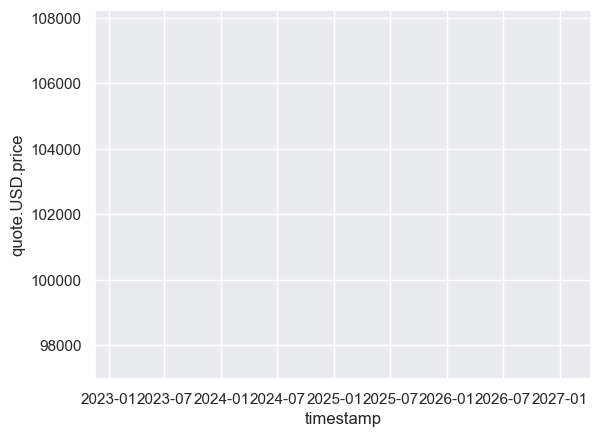

In [59]:
sns.set_theme(style='darkgrid')

sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)